In [496]:
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from graphviz import Source
from sklearn.datasets        import make_moons
from sklearn.tree            import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics         import *

In [497]:
dataset = make_moons(n_samples=10_000,noise=0.4)

In [498]:
X = dataset[0]
y = dataset[1]
xtrain ,xtest ,ytrain ,ytest = train_test_split(X,y,random_state=42,test_size=0.20)

In [499]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=15)

tree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=15)

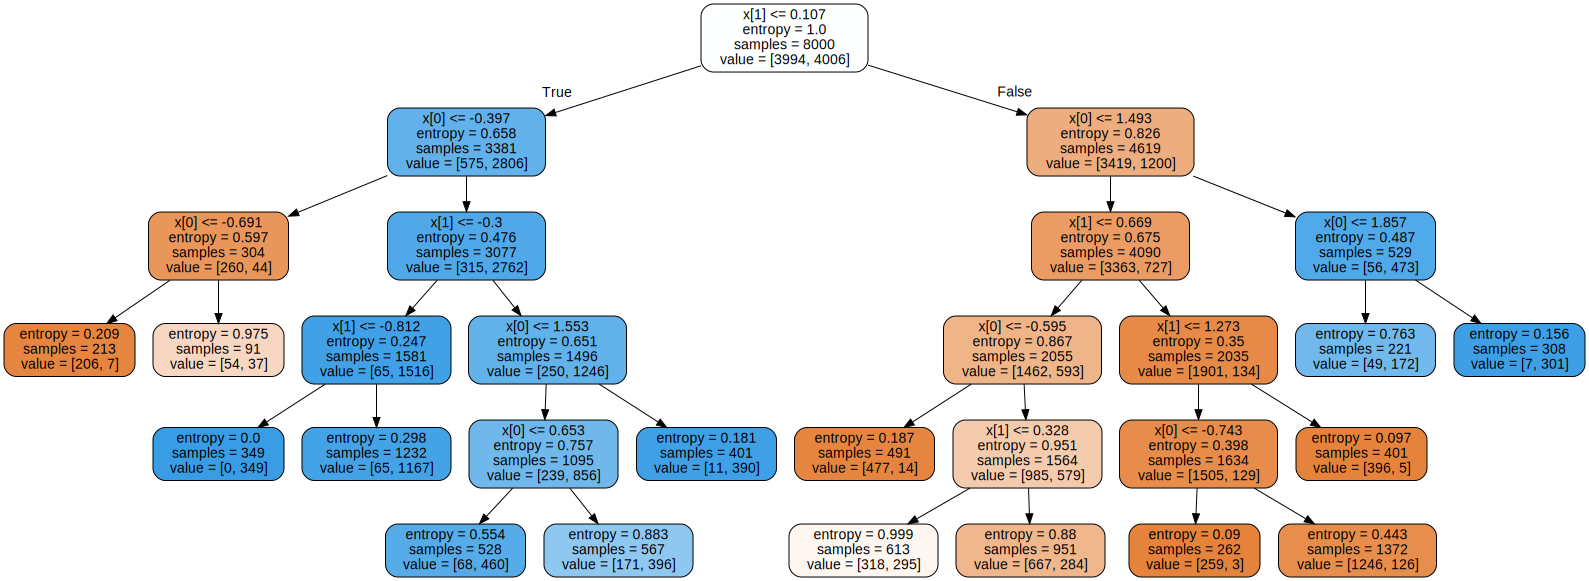

In [500]:
export_graphviz(
    decision_tree = tree,
    out_file      = 'img/TreeFirst.dot',
    rounded       = True,
    filled        = True 
)

with open('img/TreeFirst.dot', 'r') as file:
    dot_graph = file.read()
Source(dot_graph)

In [501]:
tree.tree_.max_depth,tree.tree_.n_leaves

(5, 15)

In [502]:
pred = tree.predict(xtest)

In [503]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1006
           1       0.88      0.79      0.84       994

    accuracy                           0.84      2000
   macro avg       0.85      0.84      0.84      2000
weighted avg       0.85      0.84      0.84      2000



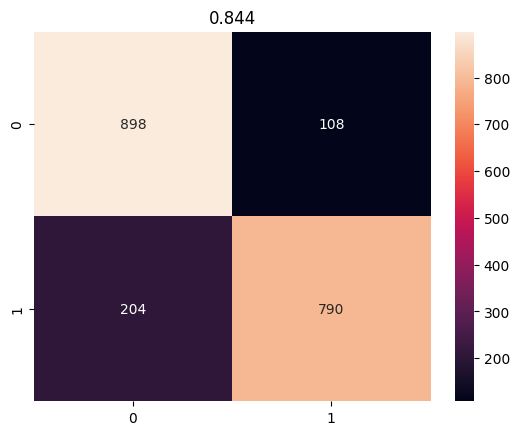

In [504]:
sea.heatmap( data = confusion_matrix(ytest,pred),annot=True,fmt='' )
plt.title(accuracy_score(ytest,pred))
plt.show()

In [511]:
from sklearn.model_selection import ShuffleSplit

shuffle = ShuffleSplit(n_splits=1_000,test_size=0.2)

for train,test in shuffle.split(X,y):
    xtrain , xtest  =X[train,:],X[test,:]
    ytrain , ytest  =y[train],y[test]
    tree = (tree)
    tree.fit(xtrain,ytrain)
    print(accuracy_score(ytest,tree.predict(xtest)))


0.854
0.8575
0.8515
0.8385
0.8455
0.845
0.841
0.8555
0.8465
0.8475
0.8545
0.8565
0.8515
0.8465
0.842
0.845
0.8515
0.85
0.859
0.851
0.854
0.836
0.847
0.855
0.848
0.858
0.8455
0.8565
0.8475
0.852
0.8555
0.8465
0.8485
0.8535
0.8545
0.8495
0.8535
0.8615
0.8545
0.844
0.847
0.8565
0.8585
0.8595
0.8455
0.855
0.831
0.859
0.839
0.847
0.855
0.8605
0.859
0.852
0.8425
0.8505
0.8495
0.8485
0.8545
0.847
0.8615
0.8525
0.854
0.845
0.849
0.853
0.853
0.8375
0.845
0.84
0.8555
0.845
0.843
0.861
0.8585
0.847
0.842
0.8635
0.859
0.856
0.8485
0.8545
0.8535
0.842
0.8425
0.8575
0.8475
0.869
0.8455
0.856
0.86
0.8455
0.8495
0.8635
0.8495
0.8505
0.846
0.84
0.845
0.8505
0.8545
0.84
0.8465
0.859
0.859
0.855
0.8615
0.853
0.8545
0.8565
0.851
0.85
0.857
0.846
0.8585
0.864
0.855
0.846
0.856
0.849
0.8475
0.852
0.8535
0.8495
0.8625
0.856
0.849
0.8545
0.8545
0.857
0.849
0.845
0.851
0.859
0.8485
0.8605
0.8505
0.836
0.8535
0.8605
0.8565
0.8675
0.8515
0.867
0.8555
0.8575
0.8385
0.8545
0.8455
0.8485
0.8465
0.8475
0.8585
0.8555